In [199]:
%pwd
import numpy as np 
from matplotlib import pyplot as plt 

In [200]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

input_shape = (3, 32, 32)

up = unpickle("./data/cifar-10-batches-py/data_batch_1")
print(up.keys())
up[b'data']


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [201]:
tests = unpickle("./data/cifar-10-batches-py/test_batch")

x_test, y_test = tests[b'data'], tests[b'labels']
tests[b'data']

array([[158, 159, 165, ..., 124, 129, 110],
       [235, 231, 232, ..., 178, 191, 199],
       [158, 158, 139, ...,   8,   3,   7],
       ...,
       [ 20,  19,  15, ...,  50,  53,  47],
       [ 25,  15,  23, ...,  80,  81,  80],
       [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8)

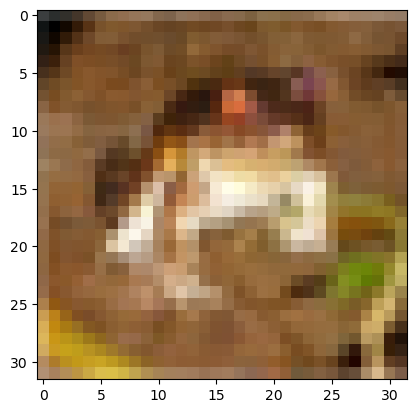

(10000, 3072) (10000,)


In [202]:

x, y = up[b'data'], up[b'labels']
nx, ny = x, np.array(y)

img = nx[0].reshape(input_shape)
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.show()

classes[ny[0]]
print(nx.shape, ny.shape)

In [203]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [204]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [208]:
from tqdm import tqdm
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in tqdm(range(10000)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = torch.tensor(nx[i], dtype=torch.float32), torch.tensor(ny[i])
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(inputs.shape)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

 21%|██▏       | 2142/10000 [00:02<00:08, 941.75it/s]

torch.Size([3072])
[1,  2000] loss: 2.306


 41%|████▏     | 4141/10000 [00:04<00:06, 975.77it/s]

torch.Size([3072])
[1,  4000] loss: 2.305


 48%|████▊     | 4845/10000 [00:05<00:05, 923.09it/s]


KeyboardInterrupt: 

tensor([ 0.0515, -0.0134,  0.0726,  0.0154,  0.0444, -0.0115,  0.0428,  0.0859,
         0.0731,  0.0781], grad_fn=<ViewBackward0>)


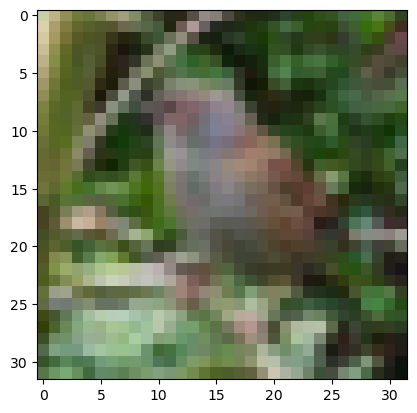

horse


In [167]:
# validate test
idx = np.random.randint(0, 100)
x = x_test[idx]
tx = torch.tensor(x, dtype=torch.float32)

out = net(tx)
print(out)
_, pred = torch.max(out, 0)

tximg = x.reshape(input_shape)
tximg.shape == img.shape

plt.imshow(np.transpose(tximg, (1, 2, 0)))
plt.show()
print(classes[pred])